In [1]:
# George Miloshevich 2021
# Plot the composite maps conditioned to TP< TP, FN, FP

# Importation des librairies

import sys
sys.path.insert(1, '../ERA')
from ERA_Fields import*
from TF_Fields import*
import importlib.util
import time
start = time.time()
def module_from_file(module_name, file_path): #The code that imports the file which originated the training with all the instructions
            spec = importlib.util.spec_from_file_location(module_name, file_path)
            module = importlib.util.module_from_spec(spec)
            spec.loader.exec_module(module)
            return module



Trying to import basemap
In this environment you cannot import Basemap
Trying to import cartopy


In this environment you cannot import Basemap


Successfully imported cartopy


2022-05-19 14:40:28.062977: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
training_name0 = 'training/__folder.France14_equalmixed_22by128__/stack_CNN_equalmixed_ckpt_t2mT14France__with_zg500_t2mmrsoFrance__u10o1_8000yrs__per_5_finetune_tau_'
list_extremes_tau = []
committor_tau = []
A_reshape_tau = []
for tau in range(0,-31,-1):
    training_name = training_name0+str(tau)
    filename = training_name+"/Funs.py"
    r = str(10)
    checkpoint = str(50)
    undersampling_rate_input = float(ReadStringFromFileRaw(filename, 'undersampling_factor')) # 
    print("===UNDERSAMPLING RATE INPUT====", undersampling_rate_input)
    #checkpoint = np.argmin(np.mean(np.load(training_name+'/my_entropy_r'+str(undersampling_rate_input)+'.npy'),0))

    historyCustom = []
    for i in range(10): # preemptively compute the optimal score
        historyCustom.append(np.load(training_name+'/batch_'+str(i)+'_history.npy', allow_pickle=True).item()['val_CustomLoss'])
    historyCustom = np.mean(np.array(historyCustom),0)
    checkpoint = np.argmin(historyCustom) # We will use optimal checkpoint in this case!
    print("========Optimal checkpoint = ", checkpoint)

    sys.path.insert(1, training_name)
    import gc

    from Funs import*

    scratch = '/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/PLASIM/'
    markers = ['|', '.', ',', 'x', '+', '*', '1', '2', '3', '4']
    X, list_extremes, thefield, sampling, percent, usepipelines, undersampling_factor_load, new_mixing,  saveweightseveryblaepoch, NUM_EPOCHS, BATCH_SIZE, checkpoint_name_load, fullmetrics = PrepareData(training_name)
    A_reshape = usepipelines[0].reshape((10,-1))
    threshold = usepipelines[1]
    #lat_from, lat_to, lon_from, lon_to = usepipelines[2:6]

    lat_from = [4,4]     # 18x42
    lat_to   = [22,22]
    lon_from = [101,0]
    lon_to   = [128,15]
    print("A_reshape.shape = ",A_reshape.shape)
    if list(usepipelines[0]>=threshold)==list_extremes:
        print("A_reshape and threshold consistent with list_extremes")
    else:
        print("A_reshape and threshold not consistent with list_extremes")
    undersampling_factor = r

    mylabels = np.array(list_extremes)


    committor = np.zeros(A_reshape.shape)            
    label_assignment = np.zeros(A_reshape.shape)
    my_metric_name = ['MCC_r'+str(undersampling_factor),'entropy_r'+str(undersampling_factor), 'skill_r'+str(undersampling_factor), 'BS_r'+str(undersampling_factor), 'WBS_r'+str(undersampling_factor), 'freq_r'+str(undersampling_factor)]
    undersampling_factor = int(undersampling_factor) # because before it can take values like 1.0 or 10.0
    for i in range(10):
        print("===============================")
        print("cross validation i = ", str(i))

        X_test, Y_test, X_mean, X_std, test_indices = NormalizeAndX_test(i, X, mylabels, undersampling_factor, sampling, new_mixing, thefield, percent, scratch+training_name)

        model = tf.keras.models.load_model(scratch+training_name+'/batch_'+str(i), compile=False) # if we just want to train


        nb_zeros_c = 4-len(str(checkpoint))
        checkpoint_name = '/cp-'+nb_zeros_c*'0'+str(checkpoint)+'.ckpt'

        model.load_weights(scratch+training_name+'/batch_'+str(i)+checkpoint_name)

        Y_pred, Y_pred_prob = ModelToProb(X,X_test,model)
        committor[i,:] = ReNormProbability(Y_pred_prob, undersampling_factor)[:,1]
        label_assignment[i,:] = np.argmax(Y_pred,1)
    A_reshape = A_reshape.flatten()
    committor = committor.flatten()
    label_assignment = label_assignment.flatten()
    list_extremes = np.array(list(map(int, list_extremes)))
    A_reshape_tau.append(A_reshape)
    committor_tau.append(committor)
    list_extremes_tau.append(list_extremes)
    print("X.shape = ",X.shape)
    print("label_assignment = ", label_assignment)
    print("list_extremes = ", list_extremes)
    TP_list =((label_assignment == 1)& (list_extremes == 1))
    TN_list = ((label_assignment == 0)& (list_extremes == 0))
    FP_list = ((label_assignment == 1)& (list_extremes == 0))
    FN_list = ((label_assignment == 0)& (list_extremes == 1))

    print(np.sum(TP_list), np.sum(TN_list), np.sum(FP_list), np.sum(FN_list))
    #TP, TN, FP, FN, new_MCC = ComputeMCC(list_extremes, label_assignment, 'True')

    print("X[TP_list,:,:,:].shape = ", X[TP_list,:,:,:].shape)

    end = time.time()
    print("Computation time = ",end - start)

found =space at 25  in |     undersampling_factor = 10 # 1 #15 #10 #5 #1 #0.25 #0.15 #0.25
 | with length =  66  extracting |  10  |
parameter =   10   at index =  123
undersampling_factor index =  123
===UNDERSAMPLING RATE INPUT==== 10.0
========Optimal checkpoint =  20
addresswithoutlocal = 'gmiloshe/PLASIM/'
Trying source:  /ClimateDynamics/MediumSpace/ClimateLearningFR/
The source will be:  /ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/PLASIM/
creation =  training/__folder.France14_equalmixed_22by128__/stack_CNN_equalmixed_ckpt_t2mT14France__with_zg500_t2mmrsoFrance__u10o1_8000yrs__per_5_finetune_tau_0
[5, 14, 'Plasim', 'France', 10, [0, 0], [22, 22], [64, 0], [128, 64], 't2m']
Loading field tas
Loaded time array
input self.var.shape = (1200000, 22, 128)
output self.var.shape = (8000, 150, 22, 128)
self.time.shape = (8000, 150)
24.0 < np.diff(self.time) < 24.0
total time: (time.time() - start_time)

Loading field zg
Loaded time array
input self.var.shape = (1200000, 22, 1

2022-05-19 14:11:59.238613: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-19 14:11:59.242036: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-05-19 14:11:59.842700: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-19 14:11:59.842759: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (apollo2048g): /proc/driver/nvidia/version does not exist
2022-05-19 14:11:59.843467: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compile

cross validation i =  1
initial lower =  61600  , initial upper =  123200
 train_false_labels_indices.shape[0] =  526680
loading /ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/PLASIM/training/__folder.France14_equalmixed_22by128__/stack_CNN_equalmixed_ckpt_t2mT14France__with_zg500_t2mmrsoFrance__u10o1_8000yrs__per_5_finetune_tau_0/permutation_1_sampling__t2m_per_5.npy
cross validation i =  2
initial lower =  123200  , initial upper =  184800
 train_false_labels_indices.shape[0] =  526680
loading /ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/PLASIM/training/__folder.France14_equalmixed_22by128__/stack_CNN_equalmixed_ckpt_t2mT14France__with_zg500_t2mmrsoFrance__u10o1_8000yrs__per_5_finetune_tau_0/permutation_2_sampling__t2m_per_5.npy
cross validation i =  3
initial lower =  184800  , initial upper =  246400
 train_false_labels_indices.shape[0] =  526680
loading /ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/PLASIM/training/__folder.France14_equalmixed_22by128_

In [ ]:
ReNormProbability(np.array([[1/11,10/11]]), undersampling_factor)

In [ ]:
list_extremes = np.array(list_extremes).reshape(8000,-1)
np.save(training_name+'/list_extremes',np.array(list_extremes))

In [ ]:
A = A_reshape.reshape(8000,-1)
np.save(training_name+'/A',A)

In [ ]:
np.save(training_name+'/threshold',np.array(threshold))

In [ ]:
committor_tau = np.array(committor_tau)
committor_tau = committor_tau.reshape(30,8000,-1)
np.save(training_name+'/committor_tau',committor_tau)

In [ ]:
import numpy as np

In [1]:
import numpy as np


training_name0 = 'training/__folder.France14_equalmixed_22by128__/stack_CNN_equalmixed_ckpt_t2mT14France__with_zg500_t2mmrsoFrance__u10o1_8000yrs__per_5_finetune_tau_'
list_extremes_tau = []
committor_tau = []
A_reshape_tau = []


for tau in range(0,-31,-1):
    training_name = training_name0+str(tau)
    A_reshape = np.load(training_name+'/A_preshaped2.npy')
    A_reshape_tau.append(A_reshape)
    committor = np.load(training_name+'/committor2.npy')
    committor_tau.append(committor)
    list_extremes = np.load(training_name+'/list_extremes_preshaped2.npy')
    list_extremes_tau.append(list_extremes)
    print("tau = ", tau, " ; A_reshape.shape = ", A_reshape.shape, " ; committor.shape = ", committor.shape, " ; list_extremes.shape = ", list_extremes.shape)

threshold = np.load(training_name+'/threshold.npy')
committor_tau = np.array(committor_tau).reshape(31,8000,-1)
A = A_reshape.reshape(8000,-1)
list_extremes = np.array(list_extremes).reshape(8000,-1)
label_assignment = committor_tau>1./11.

tau =  0  ; A_reshape.shape =  (616000,)  ; committor.shape =  (616000,)  ; list_extremes.shape =  (616000,)
tau =  -1  ; A_reshape.shape =  (616000,)  ; committor.shape =  (616000,)  ; list_extremes.shape =  (616000,)
tau =  -2  ; A_reshape.shape =  (616000,)  ; committor.shape =  (616000,)  ; list_extremes.shape =  (616000,)
tau =  -3  ; A_reshape.shape =  (616000,)  ; committor.shape =  (616000,)  ; list_extremes.shape =  (616000,)
tau =  -4  ; A_reshape.shape =  (616000,)  ; committor.shape =  (616000,)  ; list_extremes.shape =  (616000,)
tau =  -5  ; A_reshape.shape =  (616000,)  ; committor.shape =  (616000,)  ; list_extremes.shape =  (616000,)
tau =  -6  ; A_reshape.shape =  (616000,)  ; committor.shape =  (616000,)  ; list_extremes.shape =  (616000,)
tau =  -7  ; A_reshape.shape =  (616000,)  ; committor.shape =  (616000,)  ; list_extremes.shape =  (616000,)
tau =  -8  ; A_reshape.shape =  (616000,)  ; committor.shape =  (616000,)  ; list_extremes.shape =  (616000,)
tau =  -9  

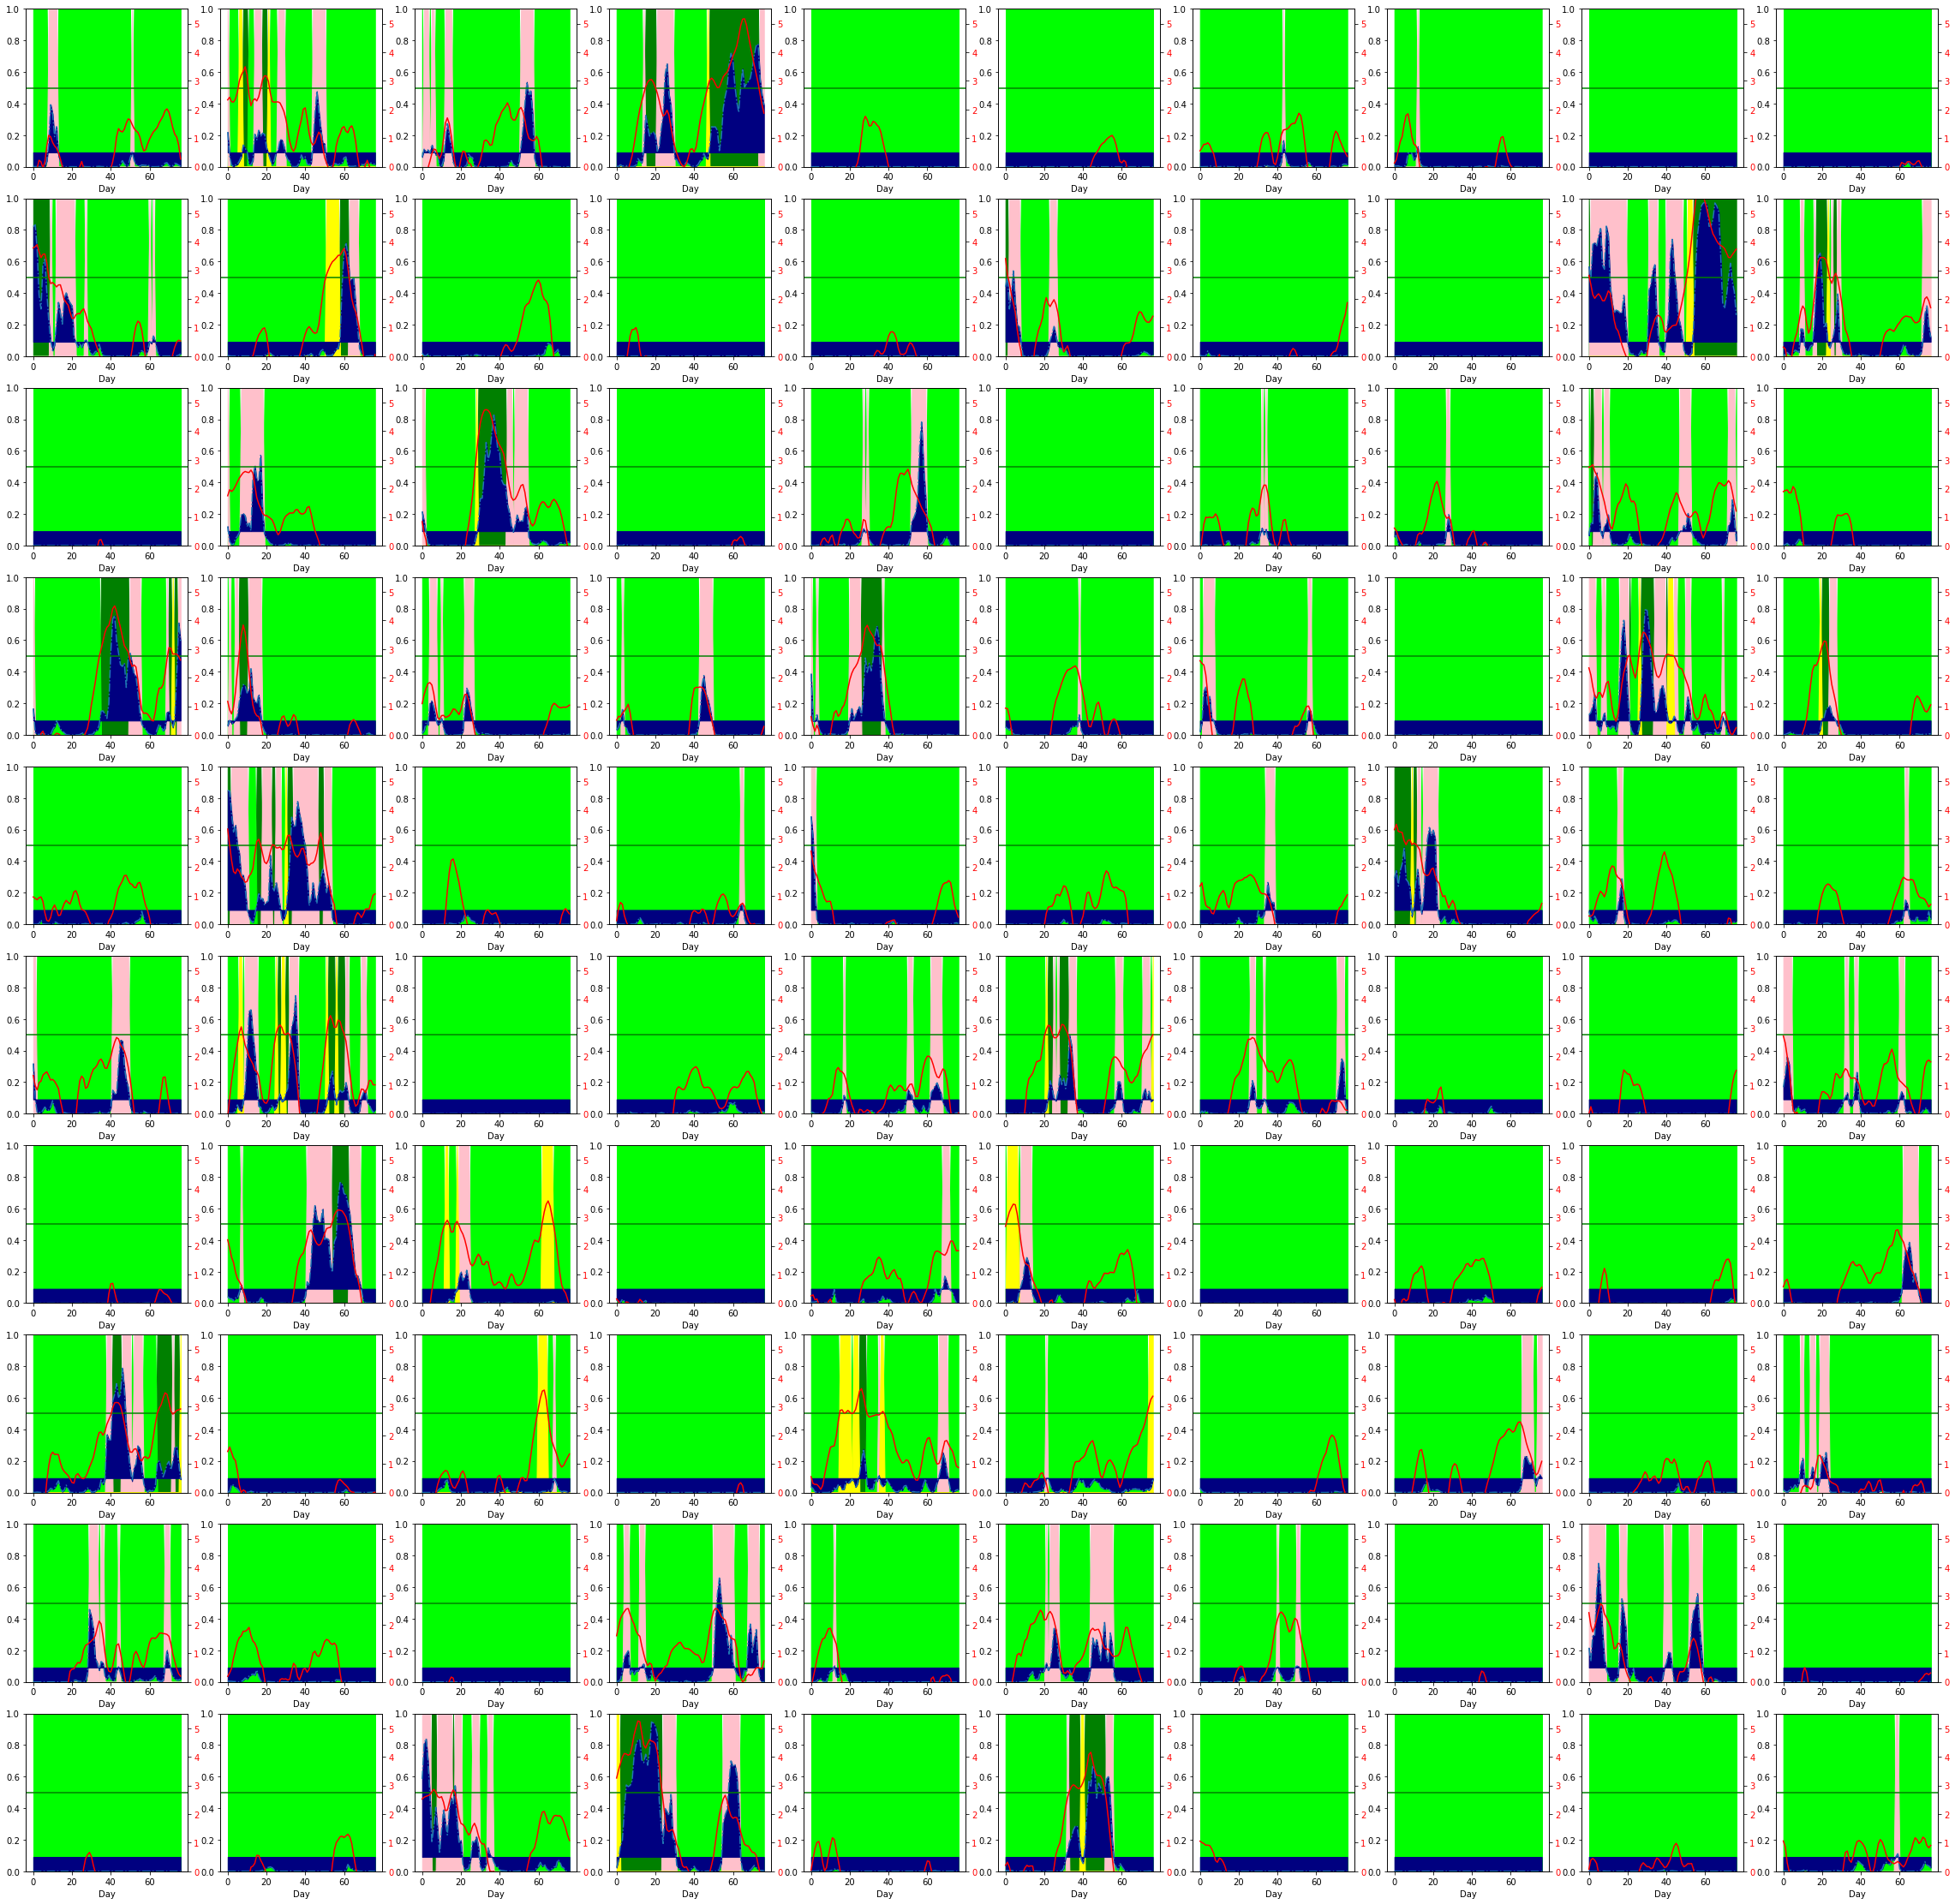

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
tau =0
TP_list =((label_assignment[tau,:] == 1)& (list_extremes == 1))
TN_list = ((label_assignment[tau,:] == 0)& (list_extremes == 0))
FP_list = ((label_assignment[tau,:] == 1)& (list_extremes == 0))
FN_list = ((label_assignment[tau,:] == 0)& (list_extremes == 1))
    
fig2 = plt.figure(figsize=(40, 40))
ax = []
spec2 = gridspec.GridSpec(ncols=10, nrows=10, figure=fig2)
for i, years in zip(range(100),range(400,400+100)):
    ix = i%10
    iy = i//10
    ax.append(fig2.add_subplot(spec2[iy,ix]))
    ax2 = ax[i].twinx()
    #ax[i].fill_between(np.arange(list_extremes[years,:].shape[0]),np.zeros(list_extremes[years,:].shape),list_extremes[years,:],color='green')
    ax[i].fill_between(np.arange(list_extremes[years,:].shape[0]),np.zeros(list_extremes[years,:].shape),TP_list[years,:],color='green')
    ax[i].fill_between(np.arange(list_extremes[years,:].shape[0]),np.zeros(list_extremes[years,:].shape),TN_list[years,:],color='lime')
    ax[i].fill_between(np.arange(list_extremes[years,:].shape[0]),np.zeros(list_extremes[years,:].shape),FP_list[years,:],color='pink')
    ax[i].fill_between(np.arange(list_extremes[years,:].shape[0]),np.zeros(list_extremes[years,:].shape),FN_list[years,:],color='yellow')
    ax[i].plot(committor_tau[0,years,:],'-.')
    ax[i].fill_between(np.arange(committor_tau[0,years,:].shape[0]),np.ones(committor_tau[0,years,:].shape)/11.,committor_tau[0,years,:],color='navy')
    ax2.axhline(y=threshold,color='green')
    ax2.plot(A[years,:],'-r')
    ax[i].set_ylim([0,1])
    ax2.set_ylim([0,2*threshold])
    ax[i].set_xlabel('Day')
    ax2.tick_params(axis='y', labelcolor='red')
    #ax[i].set_ylabel('committor and label')
    #ax2.set_ylabel('A(t)', color='red')

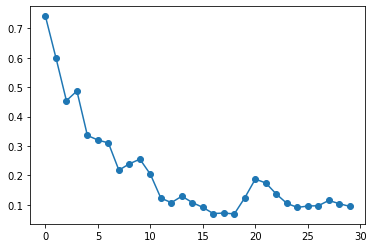

In [6]:
plt.plot([committor_tau[i,493,15] for i in range(30)],'-o')

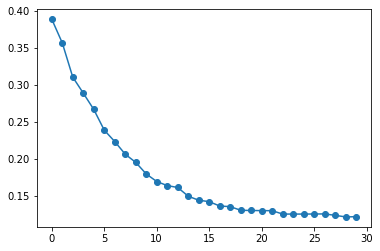

In [7]:
plt.plot([np.sum(committor_tau[i,:,:]*list_extremes)/np.sum(list_extremes) for i in range(30)],'-o')

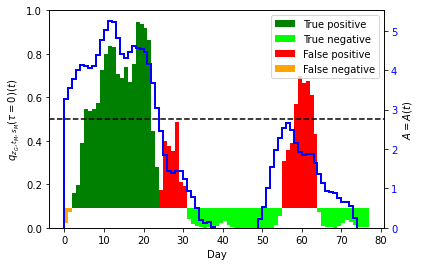

In [8]:
title = "Images/q_vs_time.png"
from math import nan as NaN
fig2 = plt.figure(figsize=(6, 4))
spec2 = gridspec.GridSpec(ncols=1, nrows=1, figure=fig2)
for i, years in zip([0],[493]):
    ix = i%10
    iy = i//10
    ax = fig2.add_subplot(spec2[iy,ix])
    ax2 = ax.twinx()
    ax.stairs(committor_tau[0,years,:]*np.array([True if x == True else NaN for x in TP_list[years,:]]),fill=True,color='green',baseline=1./11.,label='True positive')
    ax.stairs(committor_tau[0,years,:]*np.array([True if x == True else NaN for x in TN_list[years,:]]),fill=True,color='lime',baseline=1./11.,label='True negative')
    ax.stairs(committor_tau[0,years,:]*np.array([True if x == True else NaN for x in FP_list[years,:]]),fill=True,color='red',baseline=1./11.,label='False positive')
    ax.stairs(committor_tau[0,years,:]*np.array([True if x == True else NaN for x in FN_list[years,:]]),fill=True,color='orange',baseline=1./11.,label='False negative')
    
    ax2.axhline(y=threshold,color='black',linestyle='dashed')
    ax2.stairs(A[years,:],color='blue',linewidth=2)
    ax.set_ylim([0,1])
    ax2.set_ylim([0,2*threshold])
    ax.set_xlabel('Day')
    ax.set_ylabel(r'$q_{z_G, t_M, s_M}(\tau=0)(t)$')
    ax2.tick_params(axis='y', labelcolor='blue')
    ax2.set_ylabel(r'$A = A(t)$')
    ax.legend(loc='best')
#fig2.savefig(title, bbox_inches='tight', dpi=300)

In [9]:
import numpy as np


training2_name0 = 'training/__folder.France14_equalmixed_22by128__/stack_CNN_equalmixed_ckpt_t2mT14France__with_zg500_t2mmrsoFrance__u10o1_8000yrs__per_5_tau_'
list_extremes_tau2 = []
committor_tau2 = []
A_reshape_tau2 = []


for tau in range(0,-31,-1):
    training2_name = training2_name0+str(tau)
    A_reshape2 = np.load(training2_name+'/A_preshaped.npy')
    A_reshape_tau2.append(A_reshape2)
    committor2 = np.load(training2_name+'/committor.npy')
    committor_tau2.append(committor2)
    list_extremes2 = np.load(training2_name+'/list_extremes_preshaped.npy')
    list_extremes_tau2.append(list_extremes2)
    print("tau = ", tau, " ; A_reshape2.shape = ", A_reshape2.shape, " ; committor2.shape = ", committor2.shape, " ; list_extremes2.shape = ", list_extremes2.shape)

threshold2 = np.load(training2_name+'/threshold.npy')
committor_tau2 = np.array(committor_tau2).reshape(31,8000,-1)
A2= A_reshape2.reshape(8000,-1)
list_extremes2 = np.array(list_extremes2).reshape(8000,-1)
label_assignment2 = committor_tau2>1./11.

tau =  0  ; A_reshape2.shape =  (616000,)  ; committor2.shape =  (616000,)  ; list_extremes2.shape =  (616000,)
tau =  -1  ; A_reshape2.shape =  (616000,)  ; committor2.shape =  (616000,)  ; list_extremes2.shape =  (616000,)
tau =  -2  ; A_reshape2.shape =  (616000,)  ; committor2.shape =  (616000,)  ; list_extremes2.shape =  (616000,)
tau =  -3  ; A_reshape2.shape =  (616000,)  ; committor2.shape =  (616000,)  ; list_extremes2.shape =  (616000,)
tau =  -4  ; A_reshape2.shape =  (616000,)  ; committor2.shape =  (616000,)  ; list_extremes2.shape =  (616000,)
tau =  -5  ; A_reshape2.shape =  (616000,)  ; committor2.shape =  (616000,)  ; list_extremes2.shape =  (616000,)
tau =  -6  ; A_reshape2.shape =  (616000,)  ; committor2.shape =  (616000,)  ; list_extremes2.shape =  (616000,)
tau =  -7  ; A_reshape2.shape =  (616000,)  ; committor2.shape =  (616000,)  ; list_extremes2.shape =  (616000,)
tau =  -8  ; A_reshape2.shape =  (616000,)  ; committor2.shape =  (616000,)  ; list_extremes2.sha

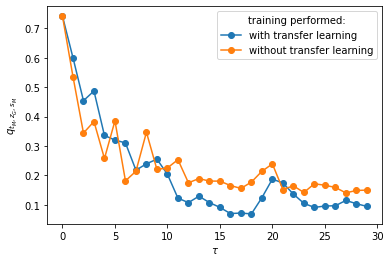

In [11]:
title = "Images/q_vs_TF.png"
fig = plt.figure(figsize=(6, 4))
plt.plot([committor_tau[i,493,15] for i in range(30)],'-o', label='with transfer learning')
plt.plot([committor_tau2[i,493,15] for i in range(30)],'-o', label='without transfer learning')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$q_{t_M, z_G, s_M}$')
plt.legend(title='training performed:')
plt.show()
fig.savefig(title, bbox_inches='tight', dpi=300)

In [20]:
for tau in [0,15,30]:
    TP_list =((label_assignment[tau,:] == 1)& (list_extremes == 1))
    TN_list = ((label_assignment[tau,:] == 0)& (list_extremes == 0))
    FP_list = ((label_assignment[tau,:] == 1)& (list_extremes == 0))
    FN_list = ((label_assignment[tau,:] == 0)& (list_extremes == 1))
    print(np.sum(TP_list), np.sum(TN_list), np.sum(FP_list), np.sum(FN_list))
    TP, TN, FP, FN, new_MCC = ComputeMCC(list_extremes.flatten(), label_assignment[tau,:].flatten(), 'True')
    

25974 524390 60810 4826
MCC =  nan  , TP =  25974  , TN =  524390  , FP =  60810  , FN =  4826
20379 508745 76455 10421
MCC =  6.399590529691236  , TP =  20379  , TN =  508745  , FP =  76455  , FN =  10421
19252 513567 71633 11548
MCC =  nan  , TP =  19252  , TN =  513567  , FP =  71633  , FN =  11548


/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/PLASIM/../ERA/ERA_Fields.py:1994: RuntimeWarning: overflow encountered in long_scalars
  if ((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN) == 0):
/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/PLASIM/../ERA/ERA_Fields.py:1997: RuntimeWarning: overflow encountered in long_scalars
  MCC = ((TPd * TNd - FPd *FNd)/ np.sqrt(((TPd+FPd)*(TPd+FNd)*(TNd+FPd)*(TNd+FNd))))
/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/PLASIM/../ERA/ERA_Fields.py:1997: RuntimeWarning: invalid value encountered in sqrt
  MCC = ((TPd * TNd - FPd *FNd)/ np.sqrt(((TPd+FPd)*(TPd+FNd)*(TNd+FPd)*(TNd+FNd))))
/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/PLASIM/../ERA/ERA_Fields.py:1994: RuntimeWarning: overflow encountered in long_scalars
  if ((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN) == 0):
/ClimateDynamics/MediumSpace/ClimateLearningFR/gmiloshe/PLASIM/../ERA/ERA_Fields.py:1997: RuntimeWarning: overflow encountered in long_scalars
  MCC = ((TPd * TNd - FPd *F

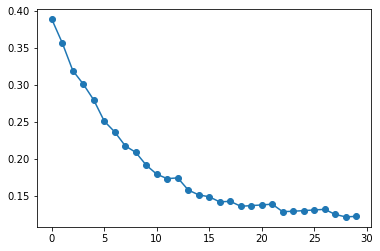

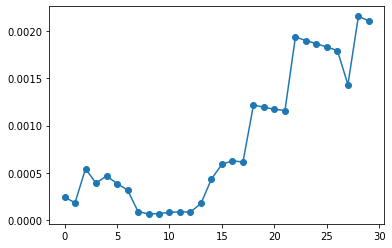

In [18]:
plt.plot([committor_tau[i,565,40] for i in range(30)],'-o')

In [24]:
Ti = np.argmax(committor_tau[0,:,:],1)
A_max = np.max(committor_tau[0,:,:],1)
year_a = range(8000)
A_max_sorted = a_decrese(A_max, Ti, year_a)

In [25]:
A_max_sorted

[(0.9960543513298035, [22, 7897]),
 (0.9940747618675232, [56, 7887]),
 (0.9939430356025696, [40, 597]),
 (0.9931606650352478, [6, 4261]),
 (0.992800772190094, [34, 1714]),
 (0.9926818013191223, [58, 7223]),
 (0.9920063614845276, [39, 1776]),
 (0.9919746518135071, [34, 3234]),
 (0.9911602735519409, [55, 5555]),
 (0.9904912710189819, [43, 7903]),
 (0.990167498588562, [30, 7329]),
 (0.9899919629096985, [53, 4301]),
 (0.9891964197158813, [7, 3565]),
 (0.9890539646148682, [14, 3833]),
 (0.9889253377914429, [11, 6475]),
 (0.9877764582633972, [16, 1161]),
 (0.9877462983131409, [3, 7485]),
 (0.9868056774139404, [57, 4440]),
 (0.9865908026695251, [6, 2843]),
 (0.9861503839492798, [0, 1576]),
 (0.9843593239784241, [7, 2580]),
 (0.9843217730522156, [31, 536]),
 (0.9840702414512634, [1, 4643]),
 (0.983566403388977, [37, 2651]),
 (0.9821977615356445, [28, 7034]),
 (0.9811212420463562, [41, 7418]),
 (0.980679452419281, [54, 4104]),
 (0.9805784821510315, [28, 2316]),
 (0.979447603225708, [25, 560]),


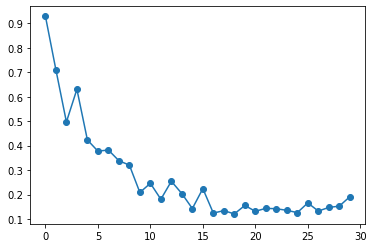

In [40]:
plt.plot([committor_tau[i,79,36-i] for i in range(30)],'-o')

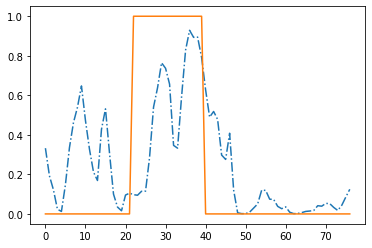

In [47]:
plt.plot(committor_tau[0,79,:],'-.')
#plt.plot(A[79,:],'--')
plt.plot(list_extremes[79,:],'-')

In [28]:
Ti = np.argmax(A,1)
A_max = np.max(A,1)
year_a = range(1000)
A_max_sorted = a_decrese(A_max, Ti, year_a)
A_max_sorted

[(7.067684, [0, 991]),
 (6.6414037, [61, 174]),
 (6.408956, [10, 429]),
 (6.120415, [7, 938]),
 (6.066326, [18, 902]),
 (6.061633, [8, 163]),
 (5.9700356, [6, 869]),
 (5.9455233, [0, 579]),
 (5.891831, [2, 623]),
 (5.7354984, [55, 362]),
 (5.718855, [9, 876]),
 (5.58988, [63, 569]),
 (5.4347467, [68, 143]),
 (5.368092, [23, 671]),
 (5.3656397, [66, 782]),
 (5.3411193, [18, 620]),
 (5.2383933, [5, 614]),
 (5.2338758, [20, 385]),
 (5.2333755, [24, 485]),
 (5.1683164, [15, 828]),
 (5.1639314, [7, 116]),
 (5.148717, [72, 69]),
 (5.132403, [38, 898]),
 (5.1195626, [57, 55]),
 (5.0980787, [30, 79]),
 (5.0817413, [1, 871]),
 (5.0771694, [5, 251]),
 (5.0718217, [11, 746]),
 (5.055835, [41, 577]),
 (5.0554576, [20, 969]),
 (5.051406, [11, 102]),
 (4.9769564, [63, 951]),
 (4.9491444, [2, 772]),
 (4.94681, [76, 23]),
 (4.907868, [14, 434]),
 (4.9019723, [8, 490]),
 (4.886236, [67, 390]),
 (4.878915, [38, 367]),
 (4.859069, [4, 739]),
 (4.8576, [0, 946]),
 (4.8566027, [15, 801]),
 (4.833774, [15, 

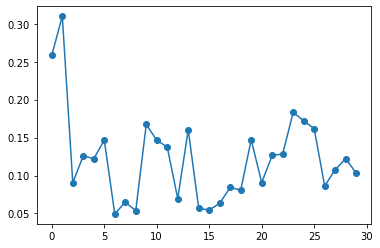

In [29]:
plt.plot([committor_tau[i,174,61-i] for i in range(30)],'-o')

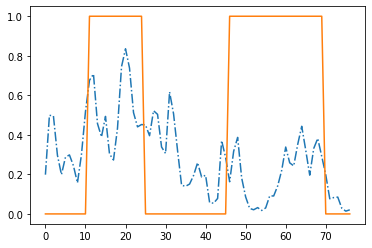

In [30]:
plt.plot(committor_tau[0,174,:],'-.')
#plt.plot(A[174,:],'--')
plt.plot(list_extremes[174,:],'-')

In [26]:
'training/__folder.France_equalmixed_22by128__/'.rsplit('/',1)


['training/__folder.France_equalmixed_22by128__', '']

In [29]:
'training/__folder.France_equalmixed_22by128__/CNN_eqlmxd_ckpt_t2mT14France__with_ABSzg500_t2mmrsoFrance__u10o1_8000yrs__per_5_finetune_tau_-10'.rsplit('/',1)

['training/__folder.France_equalmixed_22by128__',
 'CNN_eqlmxd_ckpt_t2mT14France__with_ABSzg500_t2mmrsoFrance__u10o1_8000yrs__per_5_finetune_tau_-10']

In [1]:
def make_pretty(func):
    def inner():
        print("I got decorated")
        func()
    return inner


def ordinary():
    print("I am ordinary")

In [2]:
ordinary()

I am ordinary


In [3]:
pretty = make_pretty(ordinary)

In [4]:
pretty()

I got decorated
I am ordinary


In [5]:
@make_pretty
def ordinary():
    print("I am ordinary")

In [6]:
ordinary()

I got decorated
I am ordinary


In [8]:
import numpy as np
np.random.rand(5)

array([0.98014845, 0.81324283, 0.48349461, 0.43431339, 0.18175313])

In [12]:
np.random.rand(3,3,4,5)[0:0].shape

(0, 3, 4, 5)

In [13]:
np.random.rand(3,3,4,5)[0:0]

array([], shape=(0, 3, 4, 5), dtype=float64)

In [17]:
a = []
for i in range(5):
    a.append(np.arange(0,i))

In [18]:
a

[array([], dtype=int64),
 array([0]),
 array([0, 1]),
 array([0, 1, 2]),
 array([0, 1, 2, 3])]

In [19]:
np.concatenate(a)

array([0, 0, 1, 0, 1, 2, 0, 1, 2, 3])